<a href="https://colab.research.google.com/github/carvalhopinheiro/Ciencia-de-Dados/blob/main/C%C3%B3pia_de_DSNP_3_0_%5BTemplate%5D_Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

# Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

 
Logo, vamos instalar e importar as bibliotecas necessárias para fazer uma breve análise exploratória entendendo o nosso problema de forma ampla e posteriormente, fazer o modelo de machine learning para o nosso problema.


##Instalação e Importação Bibliotecas

In [2]:
!pip install -q scikit-plot # INSTALAÇÃO DA BIBLIOTECA

In [3]:
# IMPORTANDO OS PACOTES NECESSÁRIOS
import numpy as np # PROCESSAMENTO DE ARRANJOS E MATRIZES
import pandas as pd # MANIPULAÇÃO E ANÁLISE DE DADOS 
import matplotlib.pyplot as plt # VISUALIZAÇÃO DE DADOS
import seaborn as sns # VISUALIZAÇÃO DE DADOS
from sklearn.preprocessing import StandardScaler, LabelEncoder # PADRONIZAÇÃO DOS DADOS
from sklearn.model_selection import train_test_split # DIVISÃO DOS DADOS EM TESTE E TREINO 
from imblearn.under_sampling import RandomUnderSampler # BALANCEAMENTO DOS DADOS
from imblearn.over_sampling import RandomOverSampler # BALANCEAMENTO DOS DADOS
from sklearn.linear_model import LogisticRegression # MODELO DE REGRESSÃO LOGÍSTICA
from sklearn.tree import DecisionTreeClassifier # MODELO DE ÁRVORE DE DECISÃO
import scikitplot as skplt # GRÁFICO DE CONFUSÃO
from sklearn.metrics import classification_report # MÉTRICAS DE DESEMPENHO DO MODELO
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score # MÉTRICAS DE DESEMPENHO DO MODELO
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

## Importação dos dados

Com essas bibliotecas instaladas e importadas vamos começar a importar os dados e mostrar suas primeiras e ultimas entradas e entender como estão dispostas nossa variáveis e seus respectivos significados.


Lembrando que os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

In [4]:
# IMPORTANDO OS DADOS
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# Análise Exploratória

### 5 Primeiras Entradas

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 5 Últimas Entradas

In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Dicionário das variáveis

* **customerID** - ID_Usuario
* **gender** - Gênero
* **SeniorCitizen** - Idoso
* **Partner** - Parceiro
* **Dependents** - Dependentes
* **tenure** - Meses
* **PhoneService** - Serviço de telefone
* **MultipleLines** - Multi linhas
* **InternetService** - Serviço de internet
* **OnlineSecurity** - Segurança Online
* **OnlineBackup** - Backup Online
* **DeviceProtection** - Proteção de dispositivo
* **TechSupport** - Suporte técnico
* **StreamingTV** - Transmissão de TV
* **StreamingMovies** - Streaming de filmes
* **Contract** - Contrato
* **PaperlessBilling** - Fatura sem papel
* **PaymentMethod** - Forma de pagamento
* **MonthlyCharges** - Cobranças Mensais
* **TotalCharges** - Custos totais
* **Churn** - Cancelamento


### Tamanho do dataset

In [7]:
print(f'O dataset conta com {df.shape[0]} linhas')
print(f'O dataset conta com {df.shape[1]} colunas')

O dataset conta com 7043 linhas
O dataset conta com 21 colunas


## Análise Exploratória dos Dados

Com uma breve noção sobre a quantidade de linhas e colunas do dataset, significados das variáveis e visualização das primeiras e últimas linhas vamos partir para a análise dos dados em si.
 
Com isso, Vamos analisar:
* Tipo dos dados
* Quantidade de linhas vazias
* Estatísticas de variáveis numéricas
* Quantidade de valores únicos por variável
 
Isso nos permite entender melhor como estão os dados no dataset.


### Tipos dos Dados

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Vemos que muitas variáveis estão como OBJECT, enquanto só uma possui valor FLOAT (número decimais) e duas sendo INT (número inteiro), por agora isso não será um problema, porém quando chegamos na parte de instanciar modelos e treinar o modelo para realizar previsões teremos que transformar essas variáveis OBJECT e variáveis do tipo INT, já que, com essa prática o modelo de machine learning desenvolve uma capacidade de previsão acima do que teria com as variáveis do tipo OBJECT.
 
Porém se formos olhar unitariamente as variáveis, existe uma variável na qual está com o tipo incorreto: A variável ``total charges`` que representa o total de cobranças por cliente esta como OBJECT, mas ela é um número, e ao tentar transformar ela em FLOAT o algoritmo da erro, pois existem valores nulos que não estão conseguindo ser transformados, para solucionar isso, vamos utilizar uma função na qual transforma as linhas preenchidas em FLOAT e as linhas vazias em vazias.


#### Conventendo a variável TotalCharges para float


In [9]:
# FUNÇÃO DE CONVERSÃO DE OBJECT PARA FLOAT
def converter_str_float(entrada):
    """
    Converte um objeto do tipo string em float.

    # Arguments
        entrada: string, string da coluna TotalCharges.

    # Returns
        Valor convertido em float, caso permita a conversão.
        NaN, caso o valor não seja apropriado.
    """

    try:
        return float(entrada)
    except ValueError:
        return np.nan

In [10]:
# APLICANDO A FUNÇÃO E CHECANDO 
df['TotalCharges'] = df['TotalCharges'].apply(converter_str_float)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Quantidade de linhas vazias

Como disse anteriormente, para resolver o problema da transformação algumas das linhas foram transformadas em valores nulos, ou seja, estão faltando dados, para uma melhor qualidade de previsão do modelo vamos substituir os valores faltantes pela mediana da variável.
 
**Por que utilizar a mediana como valor para substituir:**

A mediana é o valor que divide o conjunto de dados em dois conjuntos (50%/50%), ou seja, o valor central, com isso, Aplicar imputação utilizando a média e moda demonstra-se extremamente sensível a distribuição de dados, podendo criar grandes alterações valores analisados já a mediana tende a causar menos impacto na amostra.


In [11]:
# LINHAS VAZIAS POR VARIÁVEL
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Foram encontradas 11 linhas vazias na variável TotalCharges        

#### Substituindo as linhas vazias pela mediana

In [12]:
# SUBSTITUINDO AS LINHAS VAZIAS PELA MEDIANA
TotalChargesMedian = df.TotalCharges.median()
df['TotalCharges'].fillna(TotalChargesMedian, inplace=True)

### Estatísticas de variáveis numéricas

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Podemos analisar alguns pontos importantes com essas estatísticas, 50% dos clientes possuem:
 
* 1º - 29 meses de tempo de serviço, ou seja 2 anos e 5 meses
* 2º - Tem cobranças mensais de ``R$70``
* 3º - Já pagaram ``R$1397`` totais por cliente durante o período de tempo
 
Essas informações são importantes, pois vemos que 50% dos clientes costumam continuar no serviço por alguns meses, esses dados provavelmente afetarõ positivamente a taxa de previsão do nosso modelo.
 


### Quantidade de valores únicos por variável

In [14]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Podemos ver que a maioria das variáveis possuem poucos valores que se repetem entre os diversos clientes, lembrando que estas variáveis ainda estão como texto e será necessário transformá-las em uma solução numérica binária para as variáveis com binarias.

##Análise Exploratória das Variáveis

Para entender melhor como estão dispostas as variáveis para a rede de clientes vamos plotar algumas das variáveis, vale ressaltar que essa plotagem ajuda a entender melhor como os as variáveis estão dispostas podendo ser usadas para alguma estratégia empresarial no futuro, porém como o objetivo desse notebook é criar um modelo de previsão de taxa de cancelamento, plotaremos somente algumas das variáveis mais importante para auxiliar o entendimento, mas se o objetivo do notebook também fosse uma análise de dados mais precisa seria altamente recomendável analisar as outras variáveis, pois, com isso, teríamos mais dados para futuramente implementar alguma estratégia empresarial.

### Quantidade de Clientes por Gênero

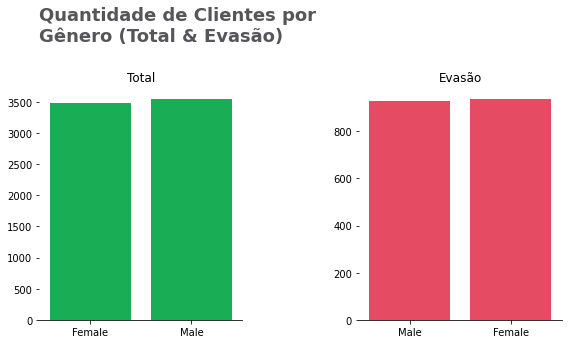

In [15]:
color1 = ['#00C752','#FE3353']
color2 = ['#FE3353','#00C752']
verde = '#00C752'
vermelho = '#FE3353'
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=2)
sns.countplot(x=df.gender, ax=ax[0],color=verde);
sns.countplot(x=df[df.Churn == 'Yes'].gender, ax=ax[1],color=vermelho);
ax[0].text(-0, 1.2,'Quantidade de Clientes por \nGênero (Total & Evasão)',transform=ax[0].transAxes, fontsize=18, fontweight='bold',color='#58555A')
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[0].set_ylabel("")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].set_title('Total')
ax[1].set_title('Evasão')
plt.tight_layout()

Podemos ver na divisão de gênero por cliente que o número total de clientes por gênero são semelhantes, tendo um número levemente maior para homens, contudo, nos clientes que cancelaram o número entre gênero também são próximos, mas ao contrário do geral, existem mais gênero feminios para as pessoas que cancelaram.

### Quantidade Total de Clientes Idosos

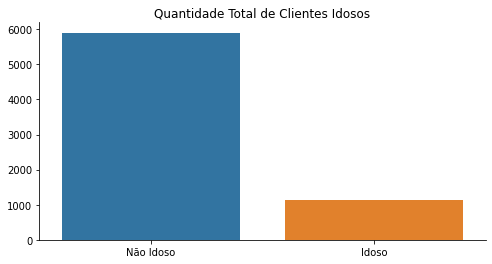

In [16]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x=df.SeniorCitizen);
ax.set_title('Quantidade Total de Clientes Idosos')
sns.set_palette(color1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)                                
ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks([0, 1], ['Não Idoso', 'Idoso'])
plt.show()

Podemos ver que no total de clientes, as pessoas idosas estão em menor número, ou seja, a empresa tem clientes jovens e adultos em maior quantidade.

### Quantidade de Clientes com Parceiros

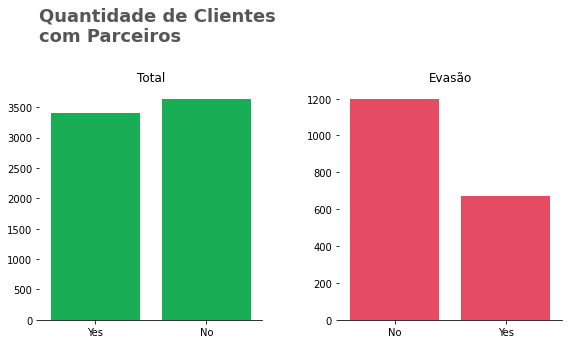

In [17]:
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=2)
sns.countplot(x=df.Partner, ax=ax[0],color=verde);
sns.countplot(x=df[df.Churn == 'Yes'].Partner, ax=ax[1],color=vermelho);
ax[0].text(-0, 1.2,'Quantidade de Clientes\ncom Parceiros',transform=ax[0].transAxes, fontsize=18, fontweight='bold',color='#58555A')
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[0].set_ylabel("")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].set_title('Total')
ax[1].set_title('Evasão')
plt.tight_layout()

Podemos ver na divisão de clientes com parceiros ou não, que o número total de clientes sem parceiros é maior, ou seja, os clientes em maior número na empresa são solteiros, contudo, os clientes que tem algum parceiro(a) tendem a cancelar menos os serviços disponibilizados.


### Quantidade de Clientes com Dependentes

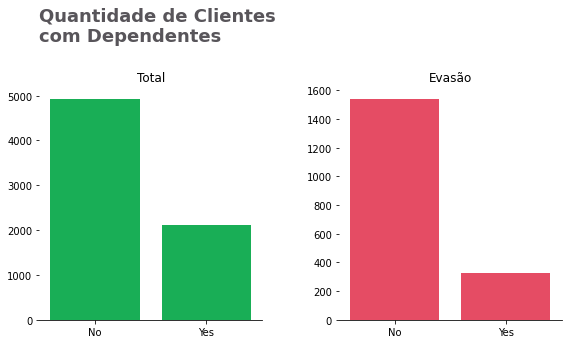

In [18]:
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=2)
sns.countplot(x=df.Dependents, ax=ax[0],color=verde);
sns.countplot(x=df[df.Churn == 'Yes'].Dependents, ax=ax[1],color=vermelho);
ax[0].text(-0, 1.2,'Quantidade de Clientes\ncom Dependentes',transform=ax[0].transAxes, fontsize=18, fontweight='bold',color='#58555A')
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[0].set_ylabel("")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].set_title('Total')
ax[1].set_title('Evasão')
plt.tight_layout()

Podemos ver na divisão de clientes com dependentes ou não que o número total de clientes sem dependentes é maior, ou seja, os clientes em maior número na empresa não possuem dependentes, essa tendência acompanha os clientes que cancelaram, com isso fica evidente que o existe mais evasão para os clientes que não possuem dependentes.

### Quantidade de Clientes por forma de pagamento

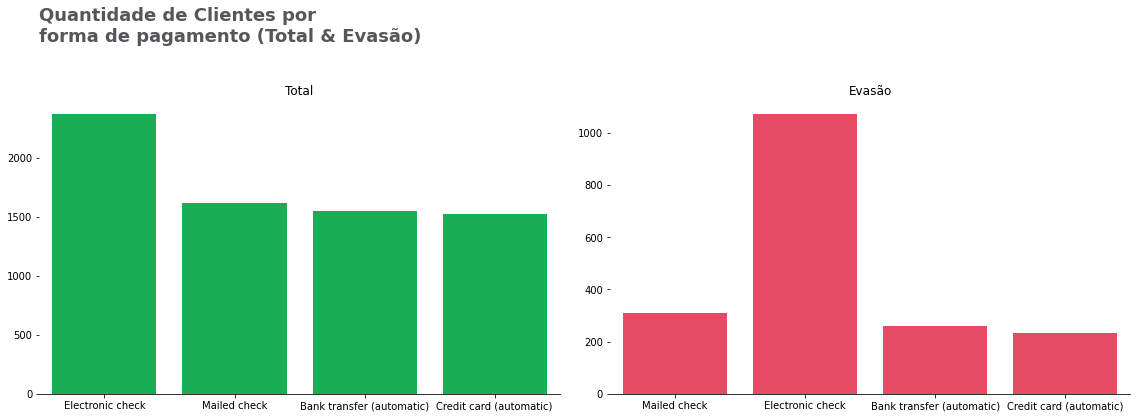

In [19]:
fig, ax = plt.subplots(figsize=(16,6),nrows=1, ncols=2)
sns.countplot(x=df.PaymentMethod, ax=ax[0],color=verde);
sns.countplot(x=df[df.Churn == 'Yes'].PaymentMethod, ax=ax[1],color=vermelho);
ax[0].text(0, 1.2,'Quantidade de Clientes por \nforma de pagamento (Total & Evasão)',transform=ax[0].transAxes, fontsize=18, fontweight='bold',color='#58555A')
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[0].set_ylabel("")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].set_title('Total')
ax[1].set_title('Evasão')
plt.tight_layout()

In [20]:
print('Quantidade de clientes totais por Contrato')
print(df.Contract.value_counts())
print( 25 *'-=')
print('Quantidade de clientes que cancelaram por Contrato')
print(df[df.Churn == 'Yes'].Contract.value_counts())

Quantidade de clientes totais por Contrato
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Quantidade de clientes que cancelaram por Contrato
Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64


Podemos perceber no gráfico que a maioria dos clientes pagam suas cobranças com Electronic Check (cheque eletrônico) e essa tendência se mantém com a taxa de evasão, ou seja, as pessoas que mais cancelam também pagam suas cobranças com Electronic Check (cheque eletrônico). Já entre o tempo de contrato a maioria dos contrato sao més a mes, eles são o tipo de contrato com maior número de cancelamentos também, sendo o contrato de dois anos o tipo de contrato com menor número de cancelamento.

### Quantidade de Clientes por mês de fidelidade

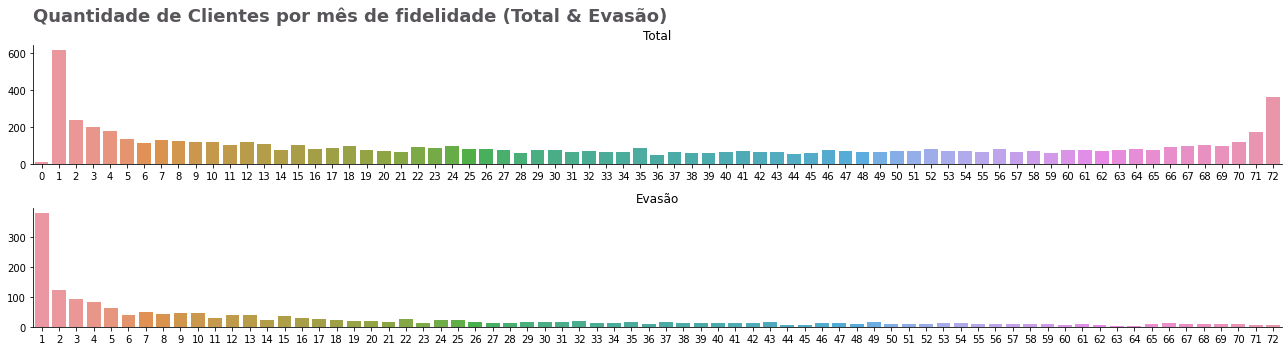

In [21]:
fig, ax = plt.subplots(figsize=(18,5),nrows=2, ncols=1)
sns.countplot(x=df.tenure, ax=ax[0]);
sns.countplot(x=df[df.Churn == 'Yes'].tenure, ax=ax[1]);
ax[0].text(0, 1.2,'Quantidade de Clientes por mês de fidelidade (Total & Evasão)',transform=ax[0].transAxes, fontsize=18, fontweight='bold',color='#58555A')
ax[0].set_title('Total')
ax[1].set_title('Evasão')
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
plt.tight_layout()

Podemos ver no gráfico a distribuição de clientes por mês, vemo que a quantidade de clientes no meses iniciais são os maiores dos gráficos, contudo existe uma grande quantidade de clientes nos meses com maiores clientes, ou seja, a empresa possui alguns clientes bastantes fiéis com mais de 6 anos com a contratação do serviço, porém essa tendência não acompanha os clientes com evasão a qual representam significamente somente os 5 primeiros meses, ou seja, se o cliente não cancelar o serviço durante os 5 primeiros meses a chance dele cancelar posteriormente vai diminuindo com o passar dos meses.

### Boxplot de Cobranças Mensais e Totais

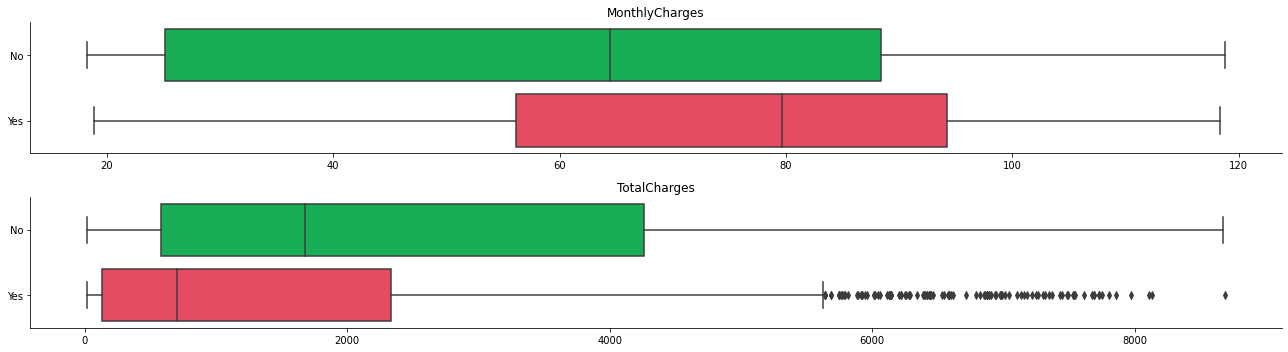

In [22]:
fig, ax = plt.subplots(figsize=(18,5),nrows=2,ncols=1)
sns.boxplot(x=df.MonthlyCharges, y=df.Churn,ax=ax[0]);
sns.boxplot(x=df.TotalCharges, y=df.Churn,ax=ax[1]);
sns.set_palette(color1)
ax[0].set_title('MonthlyCharges')
ax[1].set_title('TotalCharges')
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [23]:
df[df.Churn == 'Yes'].describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094
std,0.435799,19.531123,24.666053,1890.822994
min,0.000000,1.000000,18.850000,18.850000
25%,0.000000,2.000000,56.150000,134.500000
50%,0.000000,10.000000,79.650000,703.550000
75%,1.000000,29.000000,94.200000,2331.300000
max,1.000000,72.000000,118.350000,8684.800000


Podemos analisar alguns pontos importantes com essas estatísticas, 50% dos clientes possuem:

* 1º - 10 meses de tempo de serviço, ou seja 2 anos e 5 meses
* 2º - Tem cobranças mensais de ``R$79``
* 3º - Já pagaram ``R$700`` totais por cliente durante o período de tempo

Ou seja, em comparação com o número total, as pessoas que representam 50% do dataset cancelam 19 meses antes dos 50% das pessoas totais. Além disso pagam cerca de ``R$10`` a mais por mês.

### Quantidade de revalidação e Cancelamento

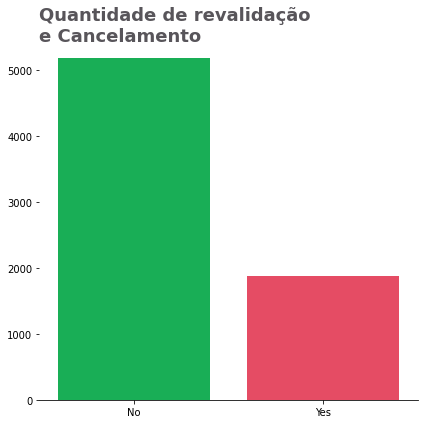

In [24]:
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(x=df.Churn, ax=ax);
ax.text(0, 1,'Quantidade de revalidação \ne Cancelamento',transform=ax.transAxes, fontsize=18, fontweight='bold',color='#58555A')
ax.set_xlabel("")
ax.set_ylabel("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()

In [25]:
# PORCETAGEM DE CANCELAMENTO 
print(f'NÃO: {df.Churn.value_counts()[0] / df.shape[0]*100:.2f}%')
print(f'SIM: {df.Churn.value_counts()[1] / df.shape[0]*100:.2f}%')

NÃO: 73.46%
SIM: 26.54%


Podemos ver que a taxa de cancelamento representa 26,54% do total, uma quantidade considerada alta.

# Preparação dos Dados 

## Exclusão de coluna customerID
Para deixar o nosso modelo de previsão mais leve e assertivo, vamos excluir a coluna customerID, pois a permanencia dela no nosso dataset influenciaria a tomada de decisão do modelo, gerando previsão pouco assertivas.

In [26]:
df = df.drop(columns=['customerID'])

## Feature Engineering
Agora para melhorar nosso modelo iremos transformar as variáveis categóricas em várias numéricas usando alguns métodos, os métodos que usaremos serao label enconder e get dummies, essa transformação vai permitir que o modelo aprenda de forma mais coerente e que possa nos dar uma previsão mais assertiva em relação a um modelo que não tenha essa transformação.
 
* **Método Label Enconder**
Essa abordagem é muito simples e envolve a conversão de cada valor categórico em uma coluna em valor binário 0 ou 1.
 
* **Método Get Dummies**
Uma Dummy Variable assume um valor 0 ou 1 para indicar a ausência ou presença de determinada variável. Diferente do Label Encoding, onde cada categoria assume um valor numérico, aqui criamos uma espécie de matriz esparça, onde cada categoria ganha uma coluna, com valores 0 indicando ausência, e 1 presença.

In [27]:
# pré processar as variáveis
var_binaria = df.nunique()[df.nunique() == 2].keys().tolist()
var_numerica = [col for col in df.select_dtypes(['int', 'float']).columns.tolist() if col not in var_binaria]
var_categorica = [col for col in df.columns.tolist() if col not in var_binaria + var_numerica]

# Label Encoding para as variáveis Binárias
le = LabelEncoder()
for i in var_binaria:
    df[i] = le.fit_transform(df[i])

# Encoding para colunas categóricas com múltiplas classes
df = pd.get_dummies(df, columns= var_categorica)

# ver as 5 primeiras entradas do novo dataframe
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [28]:
print(f'Quantiade de colunas original: 20')
print(f'Quantiade de colunas após tratamento: {df.shape[1]}')

Quantiade de colunas original: 20
Quantiade de colunas após tratamento: 41


## Separação dos dados

Vamos dividir os dados disponíveis em:

* **Dados de treinamento:** usado para treinar o modelo.
* **Dados de simulação real:** usado para comprovar que aquele modelo realmente funciona. São dados ignorados no treinamento e no processo de escolha de hiperparâmetros seriam os dados operacionais de um exemplo real.
Porque dividir os dados?

Avaliar o modelo com os mesmos dados usados no treinamento não é útil, pois isso acaba recompensando os modelos que conseguem "memorizar" os dados de treinamento, em vez de fazer a generalização a partir deles.

In [29]:
simu_real = df.sample(frac=0.15, random_state=0)
df_proc = df.drop(simu_real.index)
print(f'Dados Original: {df.shape}')
print(f'Dados de Treino: {df_proc.shape}')
print(f'Dados de simulação real: {simu_real.shape}')

Dados Original: (7043, 41)
Dados de Treino: (5987, 41)
Dados de simulação real: (1056, 41)


Após isso vamos dividir novamente os dados de treinamento em:

* **Dados de treinamento:** usado para treinar o modelo.
* **Dados de validação:** usado para comparação de diferentes modelos e hiperparâmetros.

In [30]:
#Separação entre coluna alvo e coluna de previsores
X = df_proc.drop('Churn', axis=1)
y = df_proc['Churn']
# divisão dos dados entre treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

## Feature Scaling
Após fazer a fórmula da validação cruzada vamos padronizar os dados usando:

* **StandardScaler**

Porque padronizar os dados?

* O objetivo da padronização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores, ou seja, sem a padronização a variável com maior valor influenciará bastante o resultado devido aos valores maiores e não necessariamente porque ela é mais importante como um preditor.

In [53]:
#  padronizar os  dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

## Balanceamento
Por fim vamos balancear os dados, usando técnicas de:

* **UnderSampling**
* **OverSampling**

Porque balancear os dados?

* Se você está construindo um modelo de machine learning para classificação, por exemplo, a consequência desse desequilíbrio é que o modelo terá uma tendência a dar muitos “alarmes falsos“. Ou seja, na prática ele irá responder muito bem às entradas para as classes majoritárias, mas terá um desempenho inferior para as minoritárias. No exemplo de detecção de fraude com cartões de crédito (onde o número de transações financeiras normais é bem maior que o número de transações fraudulentas), um classificador tenderá a apresentar muitos falsos negativos – uma situação indesejável para um banco, obviamente.


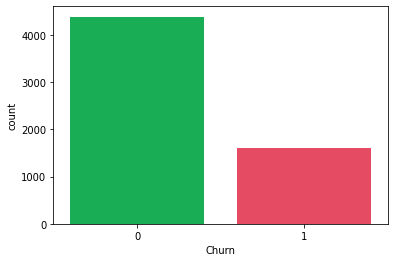

In [32]:
sns.countplot(x=y);

In [33]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

Tamanho Sem Balaceamento: 4490
Tamanho Com Over Sampling: 6574
Tamanho Com Under Sampling: 2406


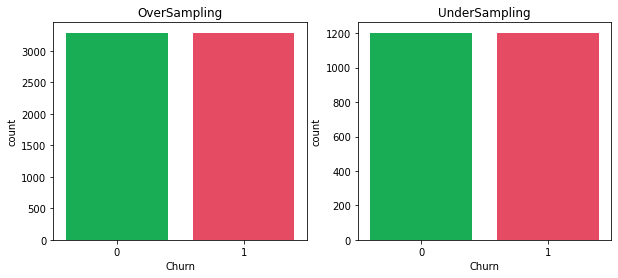

In [34]:
# Checar o tamanho do dataset após o balanceamento
print(f'Tamanho Sem Balaceamento: {y_train.shape[0]}')
print(f'Tamanho Com Over Sampling: {y_ros.shape[0]}')
print(f'Tamanho Com Under Sampling: {y_rus.shape[0]}')
# plot tamanho do dataset após o balanceamento
fig, ax = plt.subplots(nrows=1 , ncols=2, figsize=(10, 4))
sns.countplot(x=y_ros, ax=ax[0]);
sns.countplot(x=y_rus, ax=ax[1]);
ax[1].set_title('UnderSampling')
ax[0].set_title('OverSampling')
plt.show()


## Validação Cruzada
A validação cruzada é uma técnica para avaliar como a análise estatística se generaliza para um conjunto de dados independente. É uma técnica para avaliar modelos de aprendizado de máquina treinando vários modelos em subconjuntos dos dados de entrada disponíveis e avaliando-os no subconjunto complementar dos dados. Usando validação cruzada, há grandes chances de que possamos detectar o ajuste excessivo com facilidade.

In [35]:
def val_model(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: DataFrame, contém as variáveis independentes.
        y: Series, vetor contendo a variável alvo.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """

    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))

    return scores.mean()

In [36]:
#MODELO COM DADOS DE TREINO
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.51 (+/- 0.03)


## Modelo de Machine Learning

features mais importe

### Avaliando Modelos com UnderSampling

In [37]:
# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()


model = []
recall = []
# avaliar o desempenho (recall)
for clf in (rf, dt,lr , xgb):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_rus, y_rus, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.761438
DecisionTreeClassifier,0.685764
LogisticRegression,0.799689
XGBClassifier,0.783091


### Avaliando Modelos com OverSampling

In [38]:
model2 = []
recall2 = []
# avaliar o desempenho (recall)
for clf in (rf, dt,lr , xgb):
    model2.append(clf.__class__.__name__)
    recall2.append(val_model(X_ros, y_ros, clf, quite=True))

pd.DataFrame(data=recall2, index=model2, columns=['Recall'])

,Recall
RandomForestClassifier,0.971995
DecisionTreeClassifier,0.968952
LogisticRegression,0.801338
XGBClassifier,0.830232


**Para reduzir nosso trabalho, vamos trabalhar com apenas 6 destes hiperparâmetros:**
* **n_estimators** - número de árvores na floresta;
* **max_features** - O número de features a serem considerados ao procurar a melhor divisão;
* **max_depth** - profundidade máxima das árvores;
* **min_samples_split** - Número mínimo de amostras necessárias para dividir um nó interno;
* **min_samples_leaf** - O número mínimo de amostras necessárias para estar em um nó folha;
* **bootstrap** - Se as amostras de autoinicialização serão usadas na construção de árvores. Se False, o conjunto de dados inteiro é usado para criar cada árvore

### Grid Seach

In [39]:
xgb = XGBClassifier(learning_rate=0.1)

param_grid = {
 'n_estimators':range(0,1000,50),
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ros, y_ros)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.9065961153532507 para {'n_estimators': 950}


In [41]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=950)

param_grid = {
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,5,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ros, y_ros)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.9650122321891912 para {'max_depth': 6, 'min_child_weight': 1}


In [42]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=950, max_depth=6, min_child_weight=1)
param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ros, y_ros)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.9695733560679072 para {'gamma': 0.0}


In [44]:
xgb = XGBClassifier(n_estimators=950, max_depth=6, min_child_weight=1,gamma=0)
param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ros, y_ros)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.9622766698791608 para {'learning_rate': 0.1}


## validação

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0     0.7336    1.0000    0.8463      1096
           1     1.0000    0.0075    0.0149       401

    accuracy                         0.7341      1497
   macro avg     0.8668    0.5037    0.4306      1497
weighted avg     0.8050    0.7341    0.6236      1497

AUC: 0.5037


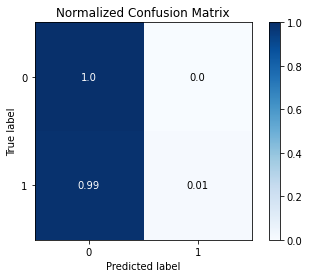

In [55]:
#DEFININDO MODELO E TREINANDO DADOS
xgb = XGBClassifier(learning_rate=0.1,n_estimators=950, max_depth=6, min_child_weight=1,gamma=0)
xgb.fit(X_ros, y_ros)
#FAZENDO PREVISAO EM CIMA DOS DADOS DE TESTE
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)
# MATRIZ CONFUSÃO
print(skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True))
# MEDIDAS DE AVALIAÇÃO
print(classification_report(y_test, y_pred, digits=4))
# AUC
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred)))


## Instruções para o modelo de churn prediction

ENTENDA O SEU PROBLEMA
* Olhar o todo e delimitar o escopo do projeto
* Como a solução vai ser usada?
* Quais são as soluções já existentes?
* Qual abordagem usar?
    * Aprendizado Supervisionado
    * Aprendizado Não Supervisionado
    * Aprendizado Por Reforço
* Qual é a métrica de performance?
* Qual a performance mínima esperada para atingir o objetivo?
* Liste as premissas básicas do projeto
* Pesquise sobre *churn rate* no Google
* Veja os serviços que outras empresas de Telecom oferecem 

EXPLORAR OS DADOS
* Estudar cada atributo e suas características:
    * Nome
    * Tipo
        * Categórica
        * Numérica
            * int
            * float
        * Estruturada
        * Não Estruturada
        * etc
    * % de valores ausentes
    * Ruído nos dados e tipo de ruído (outliers, estocásticos, erros de arredondamento)
    * Tipo de distribuição
        * Gaussiana
        * Uniforme
        * Logarítmica
        * etc
* Identificar a variável alvo (target)
* Visualizar os dados
* Estudar a correlação entre os dados
* Ver o balanceamento das classes
* Identificar as transformações que podem ser aplicadas
* Identificar os dados extras que podem ser úteis


PREPARAÇÃO DOS DADOS
* Limpeza dos Dados
    * Consertar ou remover outliers
    * Preencher os valores faltantes ou eliminar as linhas/colunas
        * Zero
        * Média
        * Mediana
        * Frequência
* Seleção de atributos
    * Eliminar os atributos (*features*) que não contêm informações úteis

* *Feature Engineering*
    * Discretizar variáveis contínuas
    * Decompor *features* (categóricas, data, tempo)
    * Aplicar transformações às variáveis
    * Agregar *features* para gerar novas
    
* *Feature Scaling*
    * Normalizar ou padronizar *features*

* Dividir entre treino, teste e validação

CONSTRUIR MODELO(S) DE MACHINE LEARNING
* Analisar as variáveis mais significativas para cada algoritmo
* *Hyperparameters Tuning* (se necessário)
* Uso de *cross-validation*
* Verificar o desempenho do(s) modelo(s) e considerar métodos *Ensemble*